# Predicción del Precio de Vehículos a Partir de sus Características Principales

La intención de este notebook es analizar un conjunto de datos de automóviles con el objetivo de predecir su precio a partir de diferentes características relevantes.

El dataset proveniente de Alemania contiene información asociada a distintos atributos, como el kilometraje, la marca, el año de registro, el tipo de caja de cambios, el estado del vehículo en cuanto a reparaciones previas, ubicación del vendedor y el tipo de combustible, los cuales representan factores comúnmente considerados en el mercado automotor.

En una primera etapa, se realiza un análisis exploratorio de los datos (EDA) con el fin de comprender la distribución de las variables, identificar patrones, detectar valores atípicos y analizar posibles relaciones entre los atributos y el precio. Posteriormente, se entrena un modelo predictivo capaz de estimar el valor de un automóvil a partir de sus características principales.

Los resultados obtenidos permiten comprender cómo ciertos atributos influyen en el valor de mercado de los automóviles, lo que puede servir como apoyo en la toma de decisiones relacionadas con la compra y venta de vehículos.

## Hipotesis:

1. Existe una relación inversa entre el kilometraje y el precio del vehículo: a menor kilometraje, mayor es el precio del auto.
2. El precio promedio de los vehículos varía según la marca del vehículo.
3. Los vehículos con un año de registro más reciente tienden a tener un precio mayor.
4. La ubicación del vendedor influye en el precio del vehículo.

In [ ]:
pip install pandas numpy matplotlib seaborn

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("1_car_pricing.csv")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [38]:
df.isna().sum()

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

Dado que las variables vehicleType, gearbox, model, fuelType y notRepairedDamage presentan una proporción considerable de valores faltantes, es mejor excluirlas del análisis exploratorio con el fin de evitar sesgos y asegurar la calidad de los resultados.

In [39]:
df_clean = df.copy()

Se realiza una copia del dataset original denominada df_clean.

In [40]:
df_clean = df_clean[df_clean['price'] > 0]
df_clean = df_clean[df_clean['price'] <= 100000]

In [41]:
df_clean = df_clean[
    (df_clean['yearOfRegistration'] >= 1950) &
    (df_clean['yearOfRegistration'] <= 2025)
]

In [42]:
df_clean = df_clean[df_clean['kilometer'] > 0]

In [43]:
df_clean = df_clean[
    df_clean['postalCode']
    .astype(str)
    .str.len() == 5
]

Se lleva a cabo un proceso de limpieza mediante la eliminación de valores atípicos e inconsistentes en las variables principales del análisis, tales como el precio, el año de registro y el kilometraje. 

En cuanto al codigo postal, se filtran aquellos registros que no cumplen con el formato estándar de cinco dígitos establecido en Alemania.

Estos filtros se aplican con el fin de garantizar la coherencia de los datos y asegurar un análisis alineado con las hipótesis planteadas.

In [44]:
cols_to_drop = [
    'index', 'dateCrawled', 'name', 'seller', 'offerType', 'abtest',
    'dateCreated', 'nrOfPictures', 'lastSeen',
    'monthOfRegistration', 'vehicleType', 'gearbox', 'model',
    'fuelType', 'notRepairedDamage'
]

df_clean.drop(columns=cols_to_drop, inplace=True)


Se eliminan aquellas columnas que no aportan información relevante para el análisis exploratorio ni para la evaluación de las hipótesis planteadas. Esta depuración permite simplificar el dataset, reducir ruido innecesario y enfocar el análisis en las variables directamente relacionadas con el precio del vehículo.

In [45]:
pd.set_option('display.max_rows', None)

df_clean['yearOfRegistration'].value_counts().sort_index()

yearOfRegistration
1950       21
1951       15
1952        9
1953       14
1954       12
1955       19
1956       28
1957       21
1958       25
1959       39
1960      147
1961       42
1962       43
1963       63
1964       69
1965      113
1966      148
1967      129
1968      138
1969      140
1970      284
1971      175
1972      220
1973      181
1974      192
1975      133
1976      160
1977      178
1978      278
1979      277
1980      487
1981      251
1982      297
1983      398
1984      378
1985      626
1986      488
1987      621
1988      845
1989     1166
1990     2267
1991     2442
1992     2692
1993     3062
1994     4336
1995     8348
1996     9753
1997    13164
1998    16258
1999    20862
2000    21931
2001    18779
2002    17953
2003    18786
2004    18658
2005    20769
2006    19148
2007    16737
2008    15339
2009    14845
2010    11807
2011    11520
2012     8997
2013     5871
2014     4618
2015     2820
2016     8693
2017     9503
2018     3639
2019       17
N

In [46]:
year_counts = df_clean['yearOfRegistration'].value_counts()

valid_years = year_counts[year_counts >= 8000].index

df_clean = df_clean[df_clean['yearOfRegistration'].isin(valid_years)]

In [47]:
pd.set_option('display.max_rows', None)

df_clean['yearOfRegistration'].value_counts().sort_index()

yearOfRegistration
1995     8348
1996     9753
1997    13164
1998    16258
1999    20862
2000    21931
2001    18779
2002    17953
2003    18786
2004    18658
2005    20769
2006    19148
2007    16737
2008    15339
2009    14845
2010    11807
2011    11520
2012     8997
2016     8693
2017     9503
Name: count, dtype: int64

Se observa que existen años con una baja cantidad de registros de vehículos, lo cual puede sesgar el análisis del dataset. Por este motivo, se aplicó un filtro para considerar únicamente aquellos años con más de 8.000 vehículos registrados, lo que permite trabajar con una muestra más representativa y confiable tanto para el análisis exploratorio como para el modelo predictivo.

In [48]:
df_clean.shape

(301850, 6)

In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301850 entries, 1 to 371526
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               301850 non-null  int64 
 1   yearOfRegistration  301850 non-null  int64 
 2   powerPS             301850 non-null  int64 
 3   kilometer           301850 non-null  int64 
 4   brand               301850 non-null  object
 5   postalCode          301850 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 16.1+ MB


In [50]:
df_clean.head()

,price,yearOfRegistration,powerPS,kilometer,brand,postalCode
1,18300,2011,190,125000,audi,66954
2,9800,2004,163,125000,jeep,90480
3,1500,2001,75,150000,volkswagen,91074
4,3600,2008,69,90000,skoda,60437
5,650,1995,102,150000,bmw,33775


In [51]:
df_clean.describe()

,price,yearOfRegistration,powerPS,kilometer,postalCode
count,301850.000000,301850.000000,301850.000000,301850.000000,301850.000000
mean,5284.670313,2004.166490,117.212794,129664.088123,53158.755948
std,6455.400222,5.442824,186.682207,35172.313109,24106.613427
min,1.000000,1995.000000,0.000000,5000.000000,10115.000000
25%,1299.000000,2000.000000,75.000000,125000.000000,33129.000000
50%,3000.000000,2004.000000,107.000000,150000.000000,51379.000000
75%,6950.000000,2008.000000,150.000000,150000.000000,72458.000000
max,100000.000000,2017.000000,20000.000000,150000.000000,99998.000000


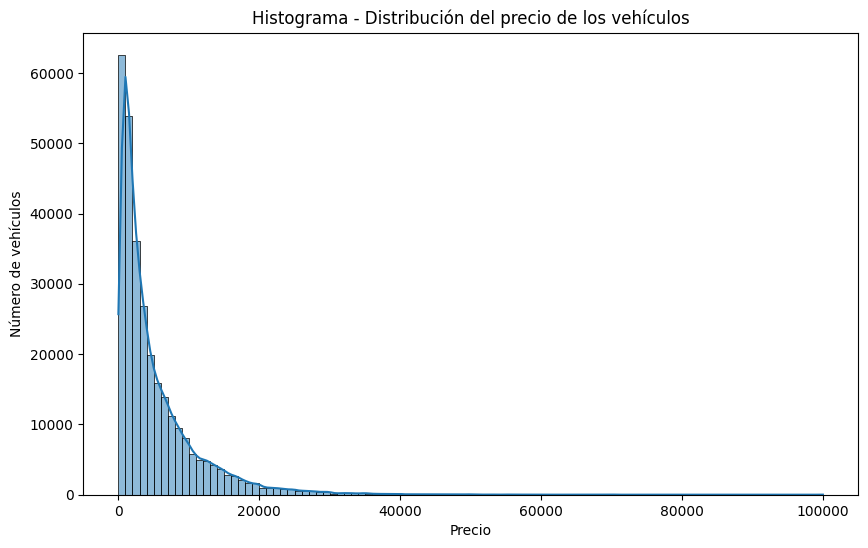

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['price'], bins=100, kde=True)

plt.title('Histograma - Distribución del precio de los vehículos')
plt.xlabel('Precio')
plt.ylabel('Número de vehículos')

plt.show()

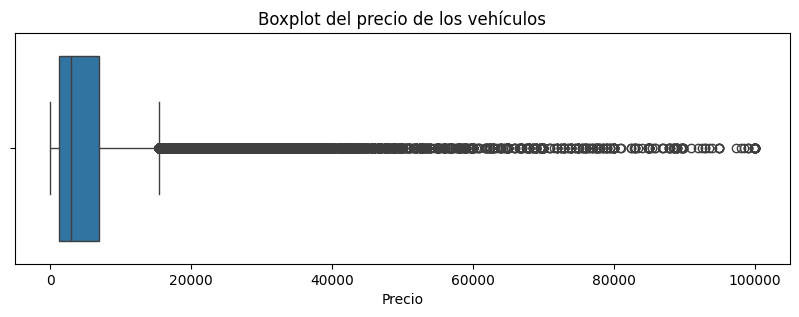

In [53]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clean['price'])

plt.title('Boxplot del precio de los vehículos')
plt.xlabel('Precio')

plt.show()


El histograma y el boxplot muestran que la distribución del precio de los vehículos es asimétrica hacia la derecha, lo que indica que la mayoría de los autos se concentran en rangos de precio bajos, mientras que existe una menor cantidad de vehículos con precios elevados. 

El boxplot confirma este comportamiento, ya que la mediana se encuentra más cercana a los valores bajos y se observan varios valores atípicos en el extremo superior. Estos outliers no representan errores, sino vehículos de alto valor o exclusivos.

## Hipotesis 1: 

Existe una relación inversa entre el kilometraje y el precio del vehículo: a menor kilometraje, mayor es el precio del auto.

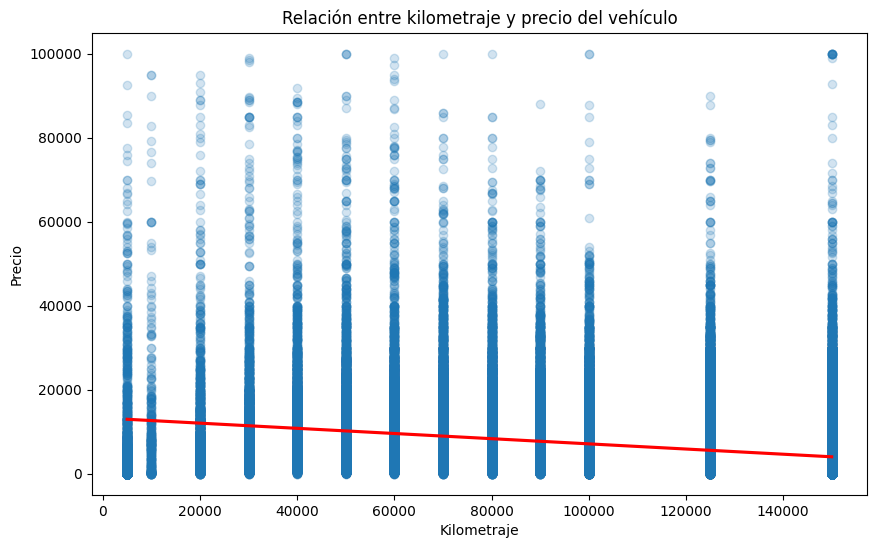

In [54]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='kilometer',
    y='price',
    data=df_clean,
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'red'}
)

plt.title('Relación entre kilometraje y precio del vehículo')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')

plt.show()


Debido a la alta concentración de observaciones, el gráfico de dispersión presenta un nivel elevado de ruido, lo que dificulta identificar la relación de forma directa. Sin embargo, al apoyarse en la línea de tendencia se observa una disminución progresiva del precio a medida que aumenta el kilometraje. Esto indica que, en general, los vehículos con mayor recorrido tienden a tener un precio más bajo.

In [55]:
df_clean['km_group'] = pd.cut(
    df_clean['kilometer'],
    bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000],
    labels=['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k']
)

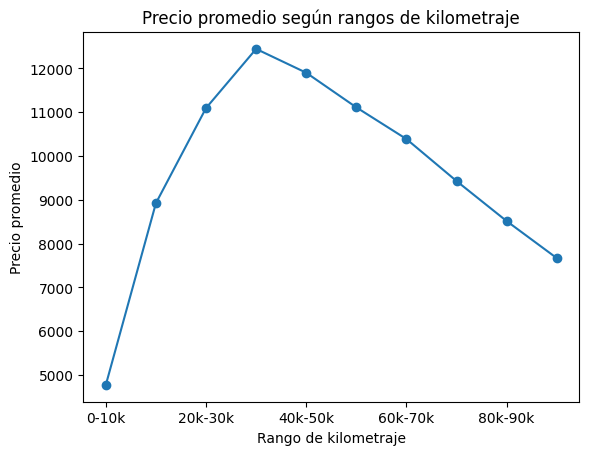

In [56]:
price_by_km = df_clean.groupby('km_group', observed=False)['price'].mean()

price_by_km.plot(kind='line', marker='o')

plt.title('Precio promedio según rangos de kilometraje')
plt.xlabel('Rango de kilometraje')
plt.ylabel('Precio promedio')

plt.show()

Se utiliza una visualización alternativa basada en el precio promedio por rangos de kilometraje. Esta gráfica permite observar de manera más clara una tendencia decreciente del precio conforme aumenta el kilometraje, mostrando de forma más evidente la relación inversa entre ambas variables y reduciendo el ruido presente en el scatterplot.

## Hipotesis 2: 

El precio promedio de los vehículos varía según la marca del vehículo.

In [57]:
price_by_brand = (
    df_clean
    .groupby('brand')['price']
    .mean()
    .sort_values(ascending=False)
)

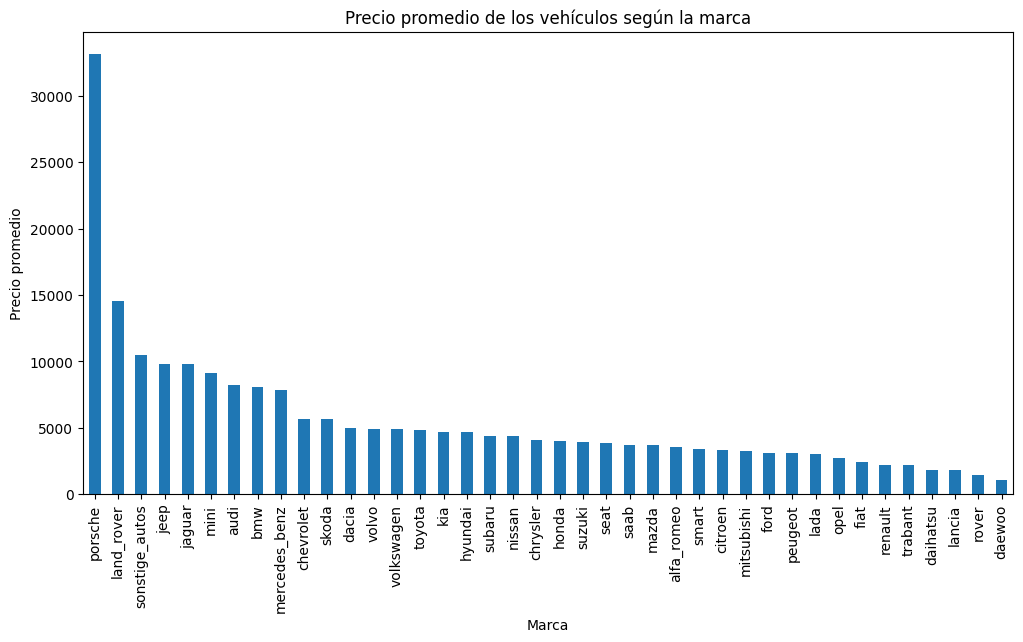

In [58]:
plt.figure(figsize=(12, 6))

price_by_brand.plot(kind='bar')

plt.title('Precio promedio de los vehículos según la marca')
plt.xlabel('Marca')
plt.ylabel('Precio promedio')
plt.xticks(rotation=90)

plt.show()

El análisis del precio promedio por marca muestra diferencias claras entre los fabricantes. Marcas como Land Rover y autos modificados (sonstige autos) presentan precios promedio elevados; sin embargo, Porsche destaca por tener el mayor precio promedio, lo que refleja una mayor valorización de sus vehículos dentro del mercado analizado.

Por otro lado, marcas como Daewoo, Rover y Lancia se concentran en rangos de precio más bajos. Estos resultados indican que el precio del vehículo varía de manera significativa según la marca.

## Hipótesis 3: 

Los vehículos con un año de registro más reciente tienden a tener un precio mayor.

In [59]:
price_by_year = (
    df_clean
    .groupby('yearOfRegistration')['price']
    .mean()
)

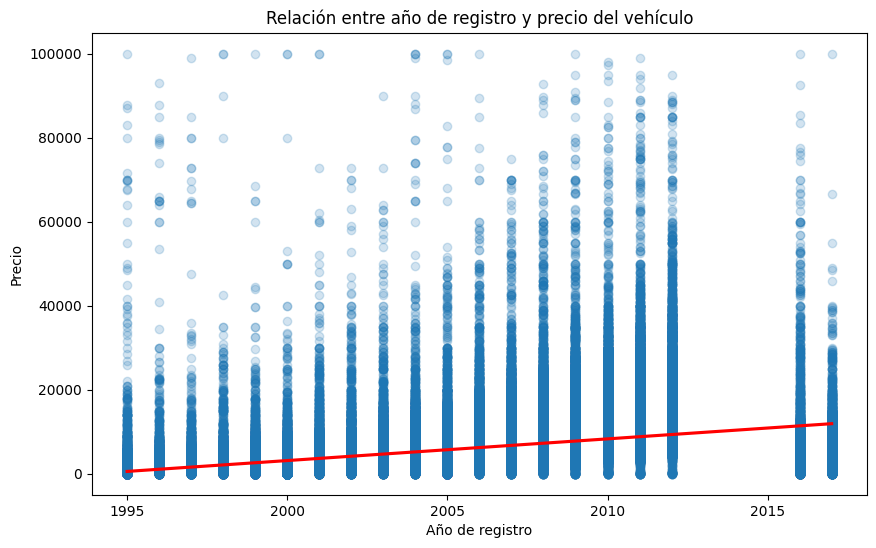

In [60]:
plt.figure(figsize=(10, 6))

sns.regplot(
    x='yearOfRegistration',
    y='price',
    data=df_clean,
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'red'}
)

plt.title('Relación entre año de registro y precio del vehículo')
plt.xlabel('Año de registro')
plt.ylabel('Precio')

plt.show()


Se observa una tendencia donde los vehículos con años de registro más recientes presentan precios promedio más altos. Esto indicando que el año de registro es un factor importante en la determinación del precio del vehículo.

## Hipotesis 4: 

La ubicación del vendedor influye en el precio del vehículo.

In [61]:
postal_region_map = {
    '1': 'Berlín, Brandeburgo, norte de Sajonia-Anhalt',
    '2': 'Hamburgo, Bremen, norte de Baja Sajonia',
    '3': 'Baja Sajonia (centro), Sajonia-Anhalt',
    '4': 'Renania del Norte-Westfalia (noroeste)',
    '5': 'Renania del Norte-Westfalia (suroeste)',
    '6': 'Hesse, parte de Renania-Palatinado',
    '7': 'Baden-Württemberg',
    '8': 'Baviera (sur)',
    '9': 'Baviera (norte), Turingia'
}

postal_region_df = pd.DataFrame(
    postal_region_map.items(),
    columns=['Primer dígito del código postal', 'Región aproximada']
)

postal_region_df

,Primer dígito del código postal,Región aproximada
0,1,"Berlín, Brandeburgo, norte de Sajonia-Anhalt"
1,2,"Hamburgo, Bremen, norte de Baja Sajonia"
2,3,"Baja Sajonia (centro), Sajonia-Anhalt"
3,4,Renania del Norte-Westfalia (noroeste)
4,5,Renania del Norte-Westfalia (suroeste)
5,6,"Hesse, parte de Renania-Palatinado"
6,7,Baden-Württemberg
7,8,Baviera (sur)
8,9,"Baviera (norte), Turingia"


In [62]:
df_clean['postal_region'] = df_clean['postalCode'].astype(str).str[0]

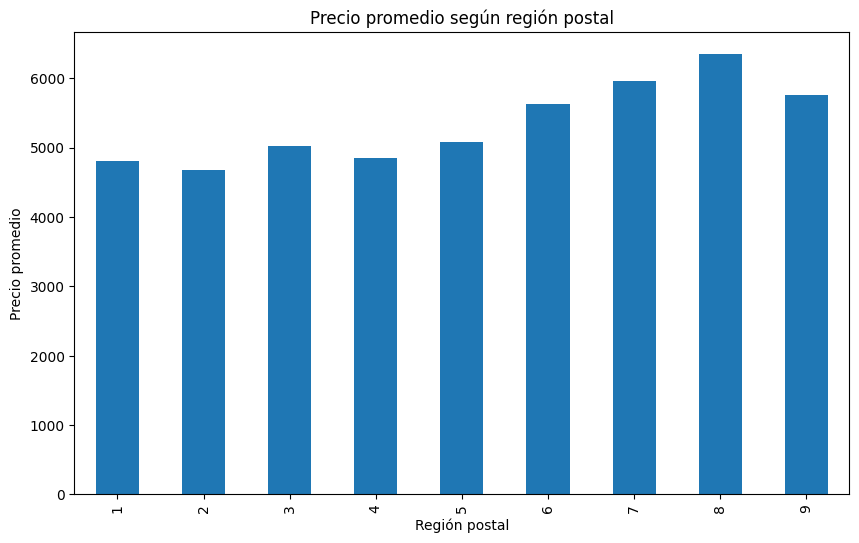

In [63]:
price_by_region = (
    df_clean
    .groupby('postal_region')['price']
    .mean()
)

plt.figure(figsize=(10, 6))
price_by_region.plot(kind='bar')

plt.title('Precio promedio según región postal')
plt.xlabel('Región postal')
plt.ylabel('Precio promedio')

plt.show()

<table>
  <thead>
    <tr>
      <th>Mapa con códigos postales de Alemania</th>
      <th>Mapa de distribución de ingresos de Alemania</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td align="center">
        <img src="alemania_codigos.png"
             alt="Mapa con códigos postales de Alemania"
             width="500"
             height="500"
             style="object-fit: contain;">
      </td>
      <td align="center">
        <img src="alemania_ingresos.png"
             alt="Mapa de distribución de ingresos de Alemania"
             width="500"
             height="500"
             style="object-fit: contain;">
      </td>
    </tr>
    <tr>
      <td align="center">Fuente: Reddit</td>
      <td align="center">Fuente: DW.com</td>
    </tr>
  </tbody>
</table>


Al agrupar los códigos postales por su primer dígito, se identifican diferencias en el precio promedio de los vehículos entre distintas regiones de Alemania. 

Regiones como Baviera (7) y Baden-Württemberg (8) presentan precios promedio más altos, mientras que zonas del norte (2) y noreste (1) muestran valores más bajos. Esto sugiere que la ubicación geográfica del vendedor está asociada al valor del vehículo.